#Eye Tracker

##Download and decompress the data
This step takes ~2 min on a 2Gb dataset.

In [56]:
from google_drive_downloader import GoogleDriveDownloader as gdd
import tarfile
import pathlib
# download the dataset
gdd.download_file_from_google_drive(file_id='1w5VN07QZygdtqAhmelHJskYD363TOOii',
                                    dest_path='./compressedData.tar')
# decompress the container
tar = tarfile.open('compressedData.tar')
tar.extractall('./compressedDataset')
tar.close()
!rm -rf compressedData.tar
# decompress the inner folders
for zipped_file in pathlib.Path("compressedDataset/").glob('*.tar.gz'):
    tar = tarfile.open(zipped_file, 'r:gz')
    tar.extractall('./dataset')
    tar.close()
!rm -rf compressedDataset

## Format the data

In [101]:
import numpy as np
import json
from PIL import Image

directory = 'dataset'
count = 0
frameSize = (300,300)
for dirName in os.listdir(directory)[:1]:
    infoPath = os.path.join(directory, dirName, 'info.json')
    with open(infoPath) as infofile:
      info = json.load(infofile)
    frameNumber = info['TotalFrames']
    leftPath = os.path.join(directory, dirName, 'appleLeftEye.json')
    rightPath = os.path.join(directory, dirName, 'appleRightEye.json')
    facePath = os.path.join(directory, dirName, 'appleFace.json')
    with open(leftPath) as l, open(rightPath) as r, open(facePath) as f:
      leftEyes = json.load(l)
      rightEyes = json.load(r)
      faces = json.load(f)
    for i in range(frameNumber):
      if (left['IsValid'][i] and right['IsValid'][i]):
        framePath = os.path.join(directory, dirName, 'frames', '%05d.jpg' % i)
        saveDirPath = os.path.join(directory, 'train', 'frames')
        if not os.path.exists(saveDirPath):
          os.makedirs(saveDirPath)
        savePath = os.path.join(saveDirPath, '%07d.jpg' % count)
        with Image.open(framePath) as frame:
          width, height = frame.size
          frame.resize((frameSize))
          frame.save(savePath, 'JPEG')
        count += 1
    print(count)
        

477


## Preparation

In [ ]:
nSamples = Y.size
validSplit = 0.2
testSplit = 0.1

### Split

In [ ]:
XTrain = X[0:int(nSamples*(1-validSplit-testSplit))]
YTrain = Y[0:int(nSamples*(1-validSplit-testSplit))]
XValid = X[int(nSamples*(1-validSplit-testSplit)):int(nSamples*(1-testSplit))]
YValid = Y[int(nSamples*(1-validSplit-testSplit)):int(nSamples*(1-testSplit))]
XTest  = X[int(nSamples*(1-testSplit)):]
YTest  = Y[int(nSamples*(1-testSplit)):]

### Standardize

In [ ]:
scaler = preprocessing.StandardScaler().fit(XTrain)
XTrain = scaler.transform(XTrain)
XValid = scaler.transform(XValid)
XTest  = scaler.transform(XTest)

## Visualize

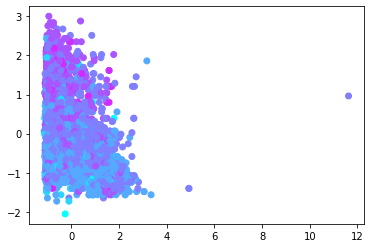

In [ ]:
plt.scatter(XTrain[:,3], XTrain[:,10], c=np.round(YTrain[:]), cmap=plt.cm.cool)